In [1]:
import numpy as np
from modules.KinTool import KinTool, LorentzVector
import matplotlib.pyplot as plt
from ROOT import Math


Welcome to JupyROOT 6.24/04


In [ ]:

data = np.load("data/raw/X.npy")
feature_names = ['Q2', 'W', 'Gamnu', 'Xbj', 'y', 't', 'phih', 
                'electron px', 'photon px', 'proton px', 
                'electron py', 'photon py', 'proton py', 
                'electron pz', 'photon pz', 'proton pz', 
                'electron E',  'photon E',  'proton E']
mpro, mele, mpho = 0.9382720813, 0.0005109989461, 1e-16
ebeam = LorentzVector(mele, 0, 0, -np.sqrt(5**2 - mele**2))
nbeam = LorentzVector(mpro, 0, 0, 275)
KT = KinTool()

real = np.zeros((data.shape[0], 12))
calc = np.zeros((data.shape[0], 12))
errs = np.zeros((data.shape[0], 12))

real_eles = np.zeros((data.shape[0], 5))
real_phos = np.zeros((data.shape[0], 5))
real_pros = np.zeros((data.shape[0], 5))

calc_eles = np.zeros((data.shape[0], 5))
calc_phos = np.zeros((data.shape[0], 5))
calc_pros = np.zeros((data.shape[0], 5))

for i, d in enumerate(data):
    if i % 100000 == 0:
        print(i)
    # ele = LorentzVector(mele, d[7], d[10], d[13])
    # pho = LorentzVector(mpho, d[8], d[11], d[14])
    # pro = LorentzVector(mpro, d[9], d[12], d[15])

    ele = LorentzVector(d[16], d[7], d[10], d[13], kind='e')
    # pho = LorentzVector(d[17], d[8], d[11], d[14], kind='e')
    pro = LorentzVector(d[18], d[9], d[12], d[15], kind='e')
    pho = ebeam + nbeam - (ele + pro)
    # pho = ebeam - (ele)

    
    # ele2 = LorentzVector(d[16], d[7], d[10], d[13], kind='e')
    # pho2 = LorentzVector(d[17], d[8], d[11], d[14], kind='e')
    # pro2 = LorentzVector(d[18], d[9], d[12], d[15], kind='e')
    ele2 = Math.PxPyPzEVector(d[7], d[10], d[13], d[16])
    pho2 = Math.PxPyPzEVector(d[8], d[11], d[14], d[17])
    pro2 = Math.PxPyPzEVector(d[9], d[12], d[15], d[18])
    

    real[i, :] = np.array([d[16],   d[17], d[18], 
                            ele2.mass(), pho2.mass(), pro2.mass(),#mele, mpho, mpro,
                            d[0], d[1], d[2], d[3], d[4], d[5] ])
    # real[i, :] = np.array([ele2.E(), pho2.E(), pro2.E(), 
    #                         ele2.mass(), pho2.mass(), pro2.mass(), 
    #                         KT.Q2(ebeam,ele2), KT.W(ebeam,nbeam,ele2), 
    #                         KT.Nu(ebeam,nbeam,ele2), KT.xBj(ebeam,nbeam,ele2), 
    #                         KT.Y(ebeam,nbeam,ele2), KT.MinusT(nbeam,pro2) ])

    calc[i, :] = np.array([ele.E(), pho.E(), pro.E(), 
                            ele.mass(), pho.mass(), pro.mass(), 
                            KT.Q2(ebeam,ele), KT.W(ebeam,nbeam,ele), 
                            KT.Nu(ebeam,nbeam,ele), KT.xBj(ebeam,nbeam,ele), 
                            KT.Y(ebeam,nbeam,ele), KT.MinusT(nbeam,pro) ])

    real_eles[i,:] = np.append([ele2.mass()], [ele2.E(), ele2.Px(), ele2.Py(), ele2.Pz()])#ele2.lv)
    real_phos[i,:] = np.append([pho2.mass()], [pho2.E(), pho2.Px(), pho2.Py(), pho2.Pz()])#pho2.lv)
    real_pros[i,:] = np.append([pro2.mass()], [pro2.E(), pro2.Px(), pro2.Py(), pro2.Pz()])#pro2.lv)

    calc_eles[i,:] = np.append([ele.mass()], ele.lv)
    calc_phos[i,:] = np.append([pho.mass()], pho.lv)
    calc_pros[i,:] = np.append([pro.mass()], pro.lv)


In [2]:
print(ebeam)
print(mele**2, ebeam.mass2())
print(mele, ebeam.mass(), "\n")

print(nbeam)
print(mpro**2, nbeam.mass2())
print(mpro, nbeam.mass(), "\n")

print(ele)
print(ele2.mass2(), ele.mass2())
print(ele2.mass(), ele.mass(), "\n")

print(pho)
print(pho2.mass2(), pho.mass2())
print(pho2.mass(), pho.mass(), "\n")

print(pro)
print(pro2.mass2(), pro.mass2())
print(pro2.mass(), pro.mass(), "\n")

[ 5.          0.          0.         -4.99999997]
2.611199229153107e-07 2.6111992568189635e-07
0.0005109989461 0.0005109989488070365 

[275.00160064   0.           0.         275.        ]
0.8803544985470337 0.8803544985421468
0.9382720813 0.9382720812973957 

[ 0.8385275  -0.19056438  0.79242265 -0.19717999]
-2.0736918404651306e-08 -2.0736918404651306e-08
-0.00014400318886973062 -0.00014400318886973062 

[ 4.52552642  0.44267899 -0.76332706 -4.43865964]
-1.7768972426779328e-07 5.7081959980109787e-05
-0.00042153258980509833 0.007555260417755948 

[ 2.7463754e+02 -2.5211462e-01 -2.9095586e-02  2.7463583e+02]
0.87429128131771 0.87429128131771
0.9350354438831235 0.9350354438831235 



In [3]:
errs = ( calc - real ) / real * 100
mins = np.min(errs, axis=0)
maxs = np.max(errs, axis=0)
mm = np.mean(errs, axis=0)
ss = np.std(errs, axis=0)
nn = ["ele E","pho E","pro E","ele M","pho M","pro M","Q2","W","Nu","xB","y","t"]

-: ave% std%, max% min%
ele E: 0.000000% 0.000000%, 0.000000% 0.000000%
pho E: 0.000326% 0.000300%, -0.000863% 0.002343%
pro E: 0.000000% 0.000000%, 0.000000% 0.000000%
ele M: 0.000000% 0.000002%, -0.000451% 0.001339%
pho M: -289.049303% 6626.224383%, -1440496.284258% 3960180.686554%
pro M: 0.000000% 0.000000%, 0.000000% 0.000000%
Q2: -0.000004% 0.000005%, -0.000035% 0.000026%
W: -0.000001% 0.000003%, -0.000047% 0.000024%
Nu: 0.002975% 0.000003%, 0.002889% 0.003032%
xB: 0.069270% 0.000007%, 0.069217% 0.069367%
y: -0.000000% 0.000001%, -0.000088% 0.000055%
t: -0.149082% 0.432429%, -24.953989% 7.979731%


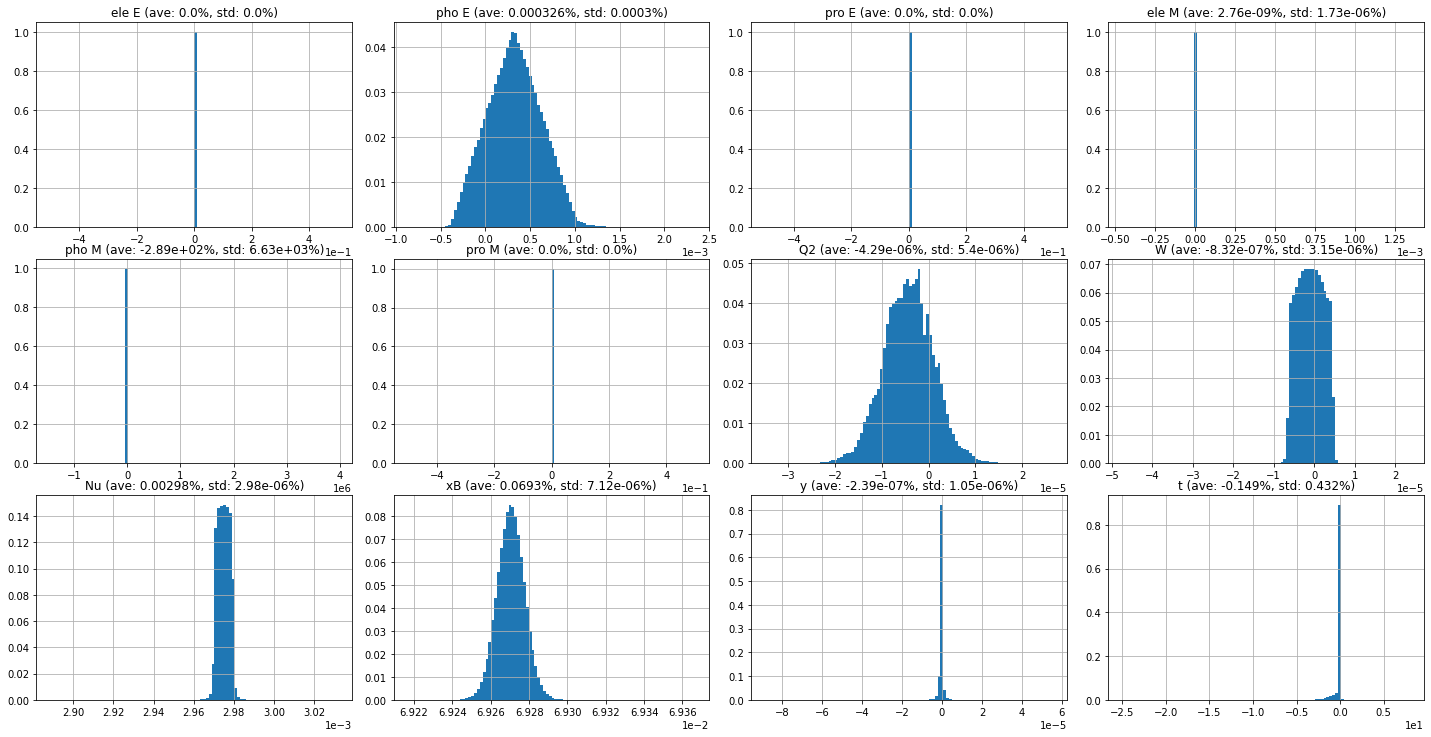

In [4]:
f, axs = plt.subplots(3,4, figsize=(20,10)); f.tight_layout()
axs = axs.flatten()
print(f"-: ave% std%, max% min%")
for ax, err, mn, mx, m, s, n in zip(axs, errs.T, mins, maxs, mm, ss, nn):
    print(f"{n}: {m:.6f}% {s:.6f}%, {mn:.6f}% {mx:.6f}%")
    ax.hist(err, bins=100, weights=np.ones_like(err)/len(err))
    ax.set_title(f"{n} (ave: {m:.3}%, std: {s:.3}%)")
    # ax.set_xlabel("% error")
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.grid()

f.savefig("imgs/perc_error_kintool.png", bbox_inches="tight")

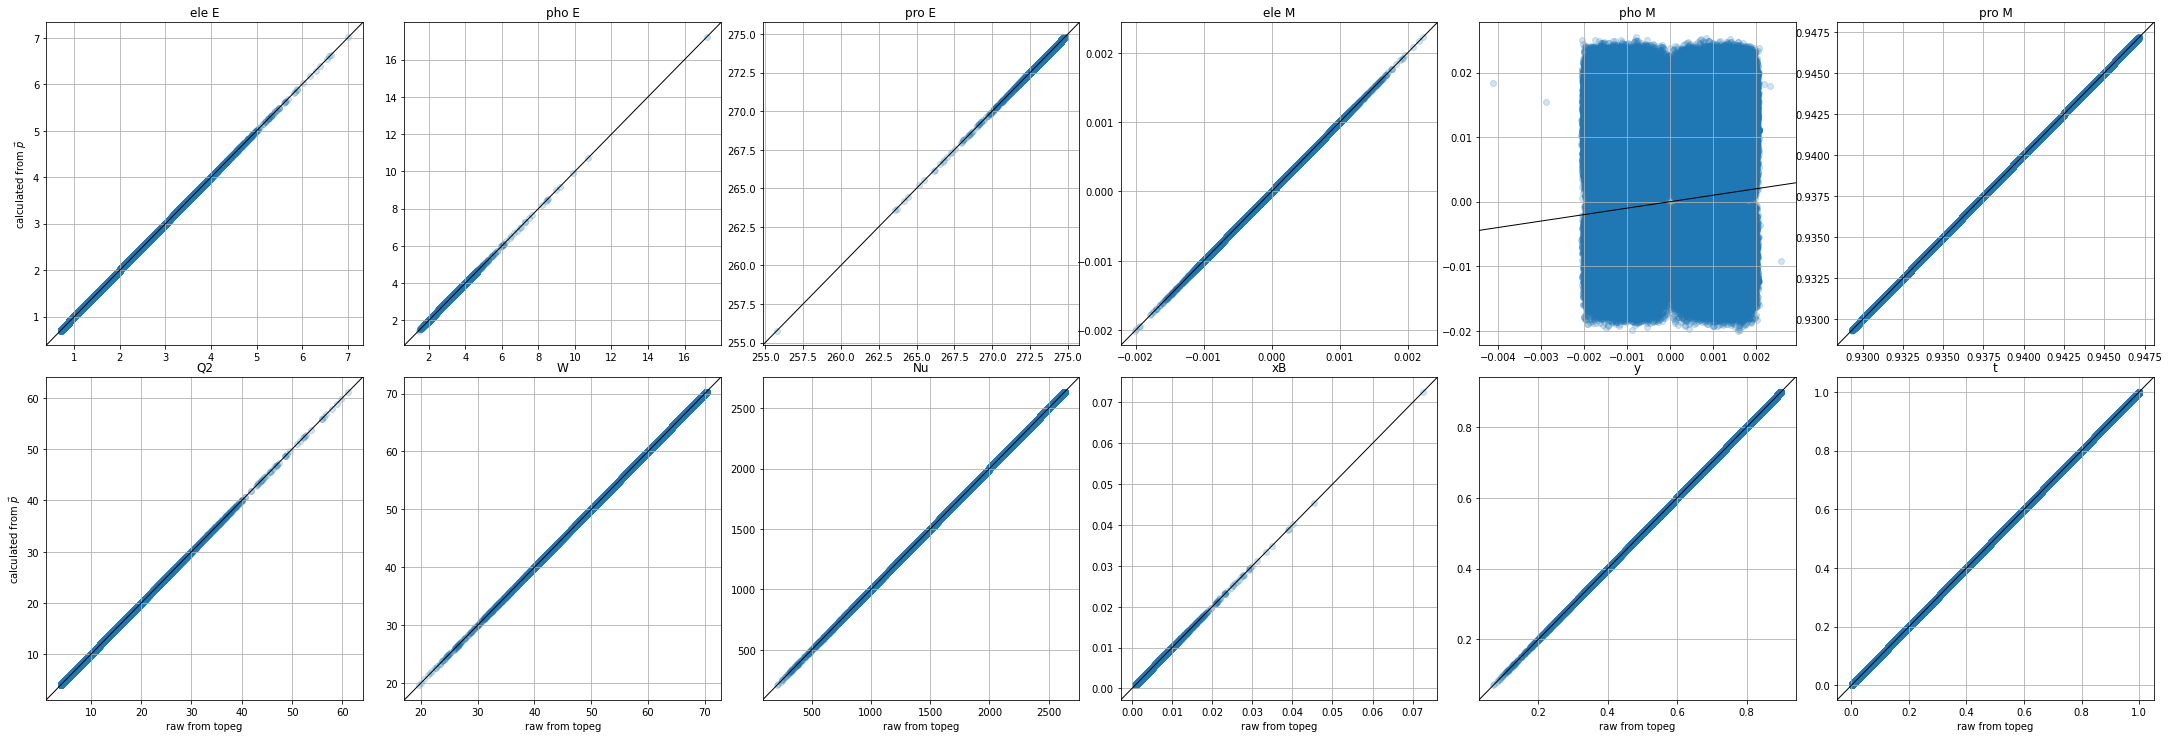

In [5]:
f, axs = plt.subplots(2,6, figsize=(30,10)); f.tight_layout()
for ax in axs[:, 0]:  ax.set_ylabel(r"calculated from $\vec{p}$")
for ax in axs[-1, :]: ax.set_xlabel("raw from topeg")
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.scatter(real[:,i], calc[:,i], alpha=0.2)#, bins=100, weights=np.ones_like(err)/len(err))
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot([-5000,5000],[-5000,5000],'k', linewidth=1)
    ax.set_title(f"{nn[i]}")
    # ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.grid()

f.savefig("imgs/scatter_kintool.png", bbox_inches="tight")

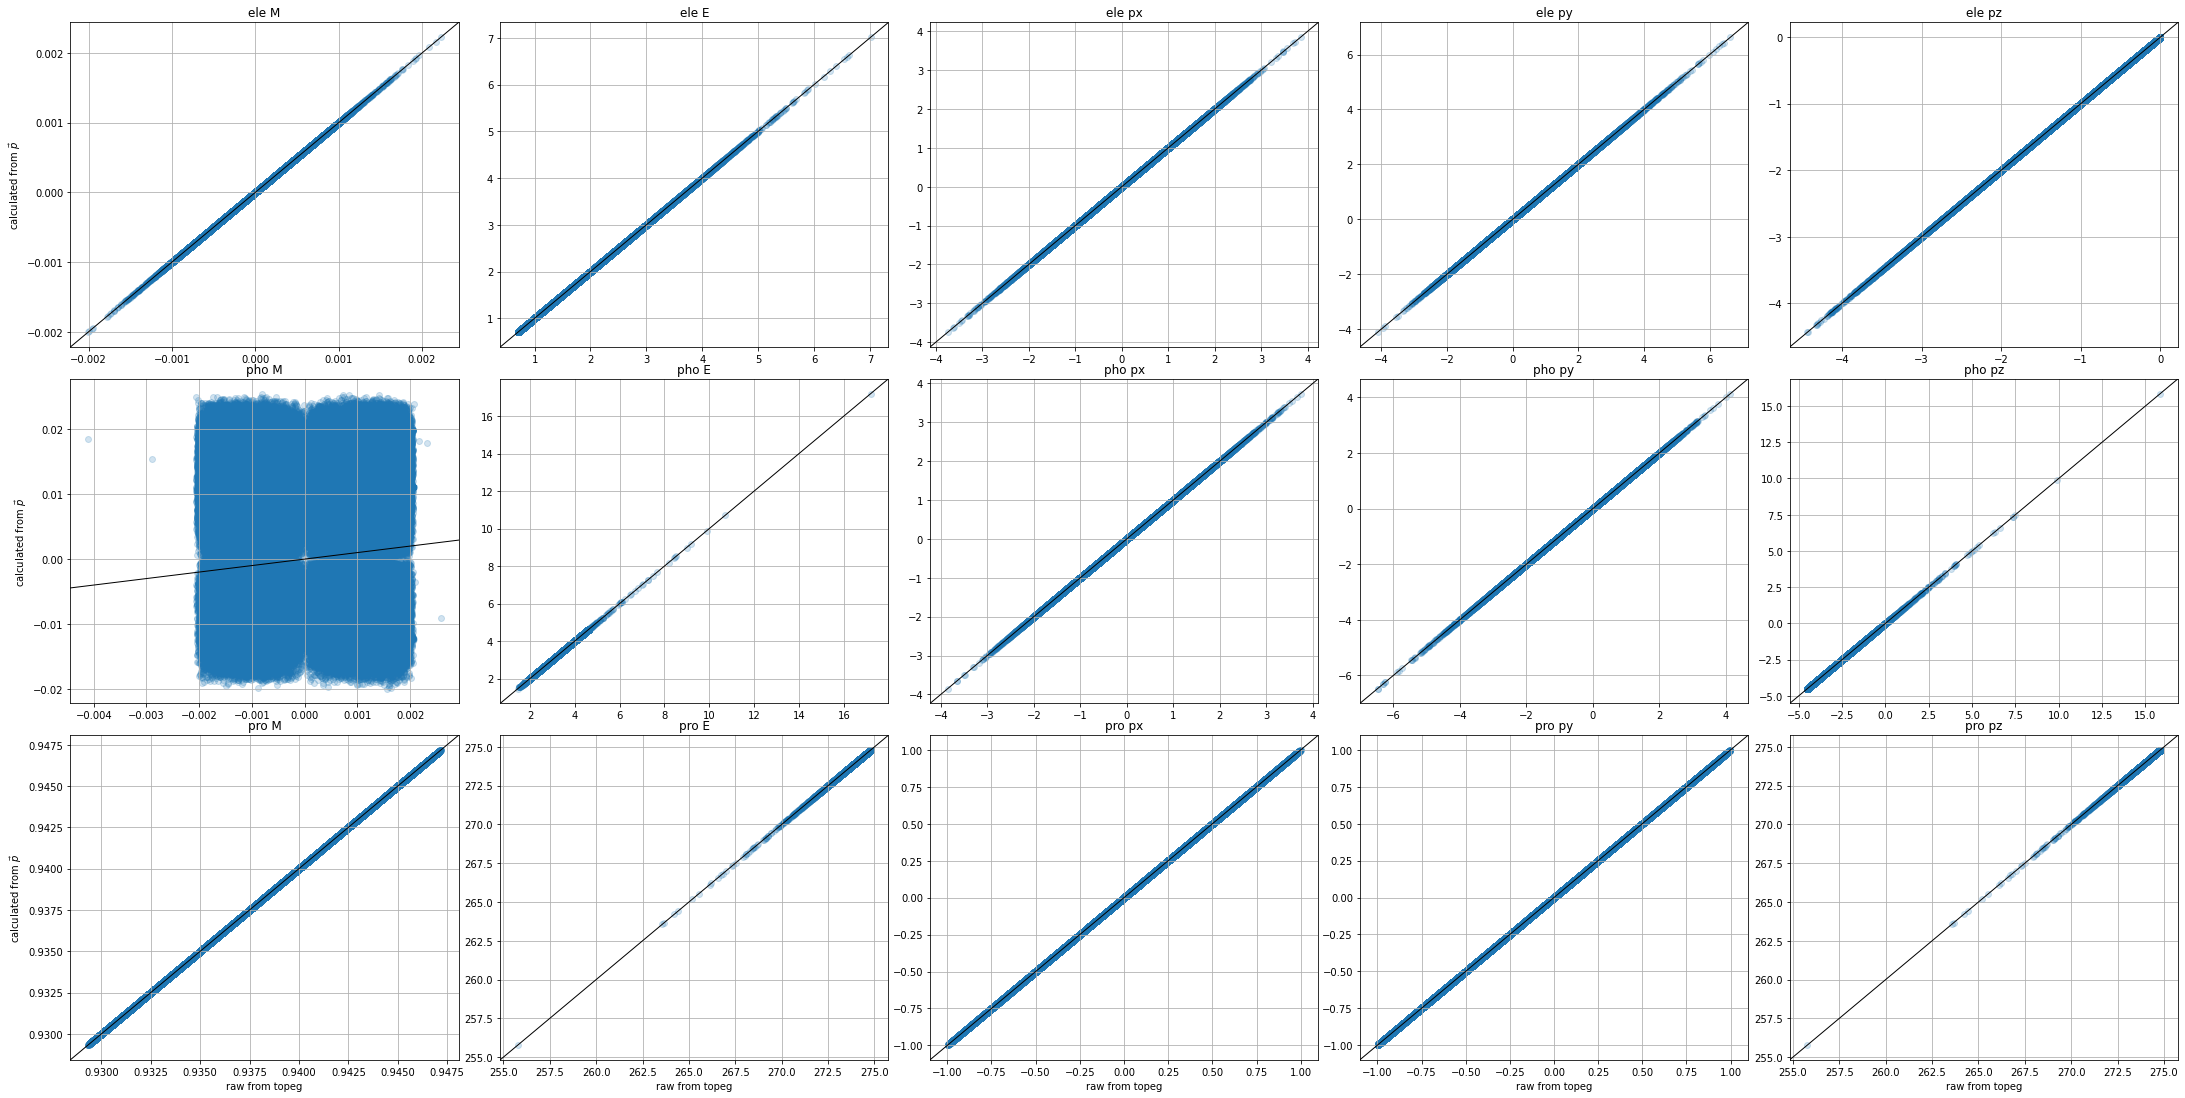

In [6]:
f, axs = plt.subplots(3,5, figsize=(30,15)); f.tight_layout()
for ax in axs[:, 0]:  ax.set_ylabel(r"calculated from $\vec{p}$")
for ax in axs[-1, :]: ax.set_xlabel("raw from topeg")
axs = axs.flatten()
lv_names = [f"{p} {a}" for p in ["ele", "pho", "pro"] for a in ["M", "E", "px", "py", "pz"]]
real_lvs, calc_lvs = np.c_[real_eles, real_phos, real_pros], np.c_[calc_eles, calc_phos, calc_pros]
for i, ax in enumerate(axs):
    ax.scatter(real_lvs[:,i], calc_lvs[:,i], alpha=0.2)#, bins=100, weights=np.ones_like(err)/len(err))
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot([-5000,5000],[-5000,5000],'k', linewidth=1)
    ax.set_title(f"{lv_names[i]}")
    # ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.grid()

f.savefig("imgs/lv_compare.png", bbox_inches="tight")

3.379642957722691e-07 -1.330188499866856e-05 0.9382919287075746
3.37964295801056e-07 0.00786303516211067 0.9382919287075746


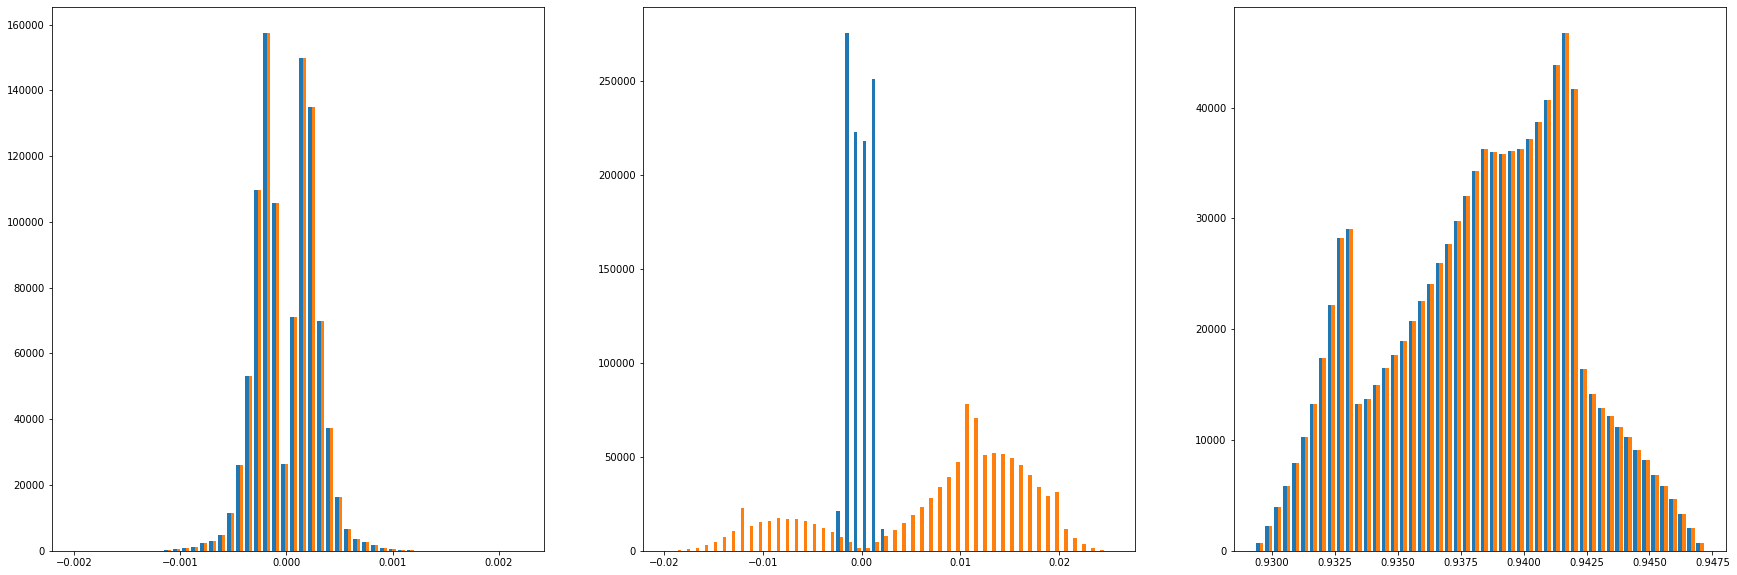

In [7]:
f, axs = plt.subplots(1, 3, figsize=(30,10))
axs[0].hist([real_eles[:,0], calc_eles[:,0]], bins=50); axs[0].set_title("ele M")
axs[1].hist([real_phos[:,0], calc_phos[:,0]], bins=50); axs[1].set_title("pho M")
axs[2].hist([real_pros[:,0], calc_pros[:,0]], bins=50); axs[2].set_title("pro M")
print(np.mean(real_eles[:,0]), np.mean(real_phos[:,0]), np.mean(real_pros[:,0]))
print(np.mean(calc_eles[:,0]), np.mean(calc_phos[:,0]), np.mean(calc_pros[:,0]))